<a href="https://colab.research.google.com/github/CFVV/MSc-assignments/blob/main/2022-2_Computer_Audition/T1_Encoding_Decoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

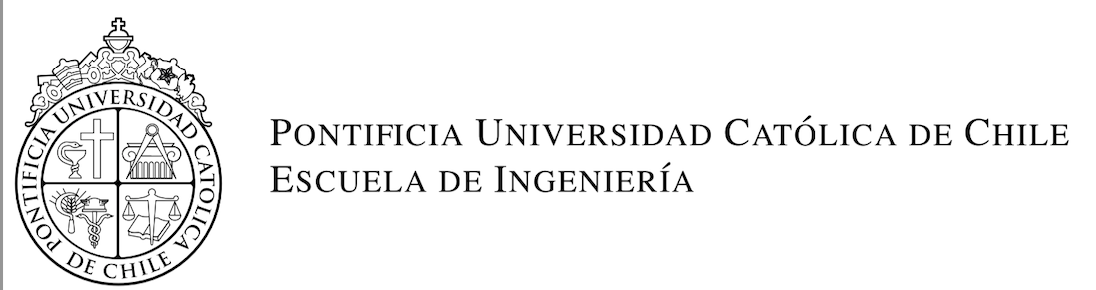

# Tarea 1: Problema invertido
### Curso Audición por Computador
### Camila Vera Villa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Magíster en Ciencias de la Ingeniería UC/2022-2_Audición_computador"

# Codificación

Pregunta 1 - 50 pts

**Codificación de información**

Escriba una función o programa en Python (o MATLAB) que codifique esta primera estrofa de Los Sonetos de la Muerte de Gabriela Mistral en una señal de audio a 44100 Hz. La información (el poema) debe estar contenida de alguna manera en la señal de audio. Nuestro ayudante es buen músico, y reservará 10 puntos de este problema para bonificar las señales de audio que a su juicio "suenen bien".

"Del nicho helado en que los hombres te pusieron,
te bajaré a la tierra humilde y soleada.
Que he de dormirme en ella los hombres no supieron,
y que hemos de soñar sobre la misma almohada."

Gabriela Mistral



Instalación e importación de librerías

In [ ]:
pip install Wave

In [ ]:
import pandas as pd
import numpy as np
import wave
from scipy.io import wavfile
from scipy.io.wavfile import write
import math
from IPython.display import Audio
from scipy.signal import square
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

Texto del poema a codificar

In [ ]:
texto = "Del nicho helado en que los hombres te pusieron, te bajaré a la tierra humilde y soleada. Que he de dormirme en ella los hombres no supieron, y que hemos de soñar sobre la misma almohada."

Creación del diccionario de letras usadas en el poema y un valor asociado a cada una

In [ ]:
letras_split = list([x for x in texto.lower()])
letter_amplitude = {letra:amplitud for letra, amplitud in zip(np.unique(letras_split), range(5, len(np.unique(letras_split))*10, 10))}

In [ ]:
letter_amplitude

{' ': 5,
 ',': 15,
 '.': 25,
 'a': 35,
 'b': 45,
 'c': 55,
 'd': 65,
 'e': 75,
 'h': 85,
 'i': 95,
 'j': 105,
 'l': 115,
 'm': 125,
 'n': 135,
 'o': 145,
 'p': 155,
 'q': 165,
 'r': 175,
 's': 185,
 't': 195,
 'u': 205,
 'y': 215,
 'é': 225,
 'ñ': 235}

Transformar a arreglo

In [ ]:
#cada letra de las palabras del poema en valores numéricos (array)
amplitudes = np.array([letter_amplitude[x.lower()] for x in texto])

Poema en números

In [ ]:
amplitudes

array([ 65,  75, 115,   5, 135,  95,  55,  85, 145,   5,  85,  75, 115,
        35,  65, 145,   5,  75, 135,   5, 165, 205,  75,   5, 115, 145,
       185,   5,  85, 145, 125,  45, 175,  75, 185,   5, 195,  75,   5,
       155, 205, 185,  95,  75, 175, 145, 135,  15,   5, 195,  75,   5,
        45,  35, 105,  35, 175, 225,   5,  35,   5, 115,  35,   5, 195,
        95,  75, 175, 175,  35,   5,  85, 205, 125,  95, 115,  65,  75,
         5, 215,   5, 185, 145, 115,  75,  35,  65,  35,  25,   5, 165,
       205,  75,   5,  85,  75,   5,  65,  75,   5,  65, 145, 175, 125,
        95, 175, 125,  75,   5,  75, 135,   5,  75, 115, 115,  35,   5,
       115, 145, 185,   5,  85, 145, 125,  45, 175,  75, 185,   5, 135,
       145,   5, 185, 205, 155,  95,  75, 175, 145, 135,  15,   5, 215,
         5, 165, 205,  75,   5,  85,  75, 125, 145, 185,   5,  65,  75,
         5, 185, 145, 235,  35, 175,   5, 185, 145,  45, 175,  75,   5,
       115,  35,   5, 125,  95, 185, 125,  35,   5,  35, 115, 12

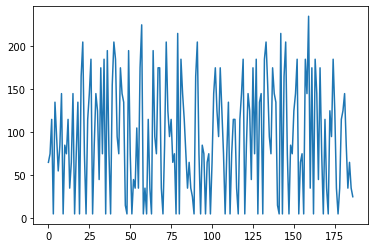

In [ ]:
plt.plot(amplitudes)

Seteo de parámetros y generación de la onda sinusoidal

In [ ]:
sample_freq = 44100
bpm = 100
measure_duration = 4 * 60. / bpm #usualmente corresponde a 4/4
t_max = 1/4 * measure_duration
freq = 440
output = np.zeros((0,))
final_wave = []
t = np.arange(0, t_max, 1/sample_freq)
print(len(t))
for amplitud in amplitudes:
  # genera la onda
  wave = np.sin(2 * np.pi * amplitud * t * 50)
  output = np.hstack((output, wave))
  final_wave.append(wave)
final_wave = np.hstack(final_wave)

26460


In [ ]:
display(Audio(output, rate = 44100))

# Decodificación

In [ ]:
# Guarda la wave (output) en formato .wav a 44100Hz
wavfile.write(path + "ok_poema_cami_100bmp.wav", sample_freq, output)

In [ ]:
muestras_por_chunk = 26460
cantidad_letras = len(output) // muestras_por_chunk
chunks = []

for i in range(cantidad_letras):

    chunk = output[i*muestras_por_chunk : (i+1)*muestras_por_chunk]
    chunks.append(chunk)
    ft_chunk = abs(fft(chunk))
    eje_frecuencia = fftfreq(muestras_por_chunk, 1/sample_freq)[:muestras_por_chunk//2]

In [ ]:
amplitudes_decod = [np.arcsin(bloque)/(2*np.pi*t*50) for bloque in chunks]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


Decodificación de las frecuencias

In [ ]:
decodificacion = [int(max(bloque[1:])) for bloque in amplitudes_decod]

In [ ]:
decodificacion

[65,
 75,
 115,
 5,
 135,
 95,
 55,
 84,
 145,
 5,
 84,
 75,
 115,
 35,
 65,
 145,
 5,
 75,
 135,
 5,
 164,
 205,
 75,
 5,
 115,
 145,
 185,
 5,
 84,
 145,
 124,
 45,
 174,
 75,
 185,
 5,
 195,
 75,
 5,
 155,
 205,
 185,
 95,
 75,
 174,
 145,
 135,
 15,
 5,
 195,
 75,
 5,
 45,
 35,
 105,
 35,
 174,
 216,
 5,
 35,
 5,
 115,
 35,
 5,
 195,
 95,
 75,
 174,
 174,
 35,
 5,
 84,
 205,
 124,
 95,
 115,
 65,
 75,
 5,
 215,
 5,
 185,
 145,
 115,
 75,
 35,
 65,
 35,
 25,
 5,
 164,
 205,
 75,
 5,
 84,
 75,
 5,
 65,
 75,
 5,
 65,
 145,
 174,
 124,
 95,
 174,
 124,
 75,
 5,
 75,
 135,
 5,
 75,
 115,
 115,
 35,
 5,
 115,
 145,
 185,
 5,
 84,
 145,
 124,
 45,
 174,
 75,
 185,
 5,
 135,
 145,
 5,
 185,
 205,
 155,
 95,
 75,
 174,
 145,
 135,
 15,
 5,
 215,
 5,
 164,
 205,
 75,
 5,
 84,
 75,
 124,
 145,
 185,
 5,
 65,
 75,
 5,
 185,
 145,
 206,
 35,
 174,
 5,
 185,
 145,
 45,
 174,
 75,
 5,
 115,
 35,
 5,
 124,
 95,
 185,
 124,
 35,
 5,
 35,
 115,
 124,
 145,
 84,
 35,
 65,
 35,
 25]

Invertir diccionario

In [ ]:
diccionario_inv = dict(zip(letter_amplitude.values(), letter_amplitude.keys()))
diccionario_inv

{5: ' ',
 15: ',',
 25: '.',
 35: 'a',
 45: 'b',
 55: 'c',
 65: 'd',
 75: 'e',
 85: 'h',
 95: 'i',
 105: 'j',
 115: 'l',
 125: 'm',
 135: 'n',
 145: 'o',
 155: 'p',
 165: 'q',
 175: 'r',
 185: 's',
 195: 't',
 205: 'u',
 215: 'y',
 225: 'é',
 235: 'ñ'}

In [ ]:
# aproximación de números pares a letras correspondientes según diccionario y cercanía
diccionario_inv[84] = "h"
diccionario_inv[164] = "q"
diccionario_inv[124] = "m"
diccionario_inv[174] = "r"
diccionario_inv[216] = "é"
diccionario_inv[206] = "ñ"
print(diccionario_inv)

{5: ' ', 15: ',', 25: '.', 35: 'a', 45: 'b', 55: 'c', 65: 'd', 75: 'e', 85: 'h', 95: 'i', 105: 'j', 115: 'l', 125: 'm', 135: 'n', 145: 'o', 155: 'p', 165: 'q', 175: 'r', 185: 's', 195: 't', 205: 'u', 215: 'y', 225: 'é', 235: 'ñ', 84: 'h', 164: 'q', 124: 'm', 174: 'r', 216: 'é', 206: 'ñ'}


In [ ]:
diccionario_inv

{5: ' ',
 15: ',',
 25: '.',
 35: 'a',
 45: 'b',
 55: 'c',
 65: 'd',
 75: 'e',
 84: 'h',
 85: 'h',
 95: 'i',
 105: 'j',
 115: 'l',
 124: 'm',
 125: 'm',
 135: 'n',
 145: 'o',
 155: 'p',
 164: 'q',
 165: 'q',
 174: 'r',
 175: 'r',
 185: 's',
 195: 't',
 205: 'u',
 206: 'ñ',
 215: 'y',
 216: 'é',
 225: 'é',
 235: 'ñ'}

In [ ]:
#invertir diccionario para asignar las letras correspondientes a cada número
texto_decodificado = [(diccionario_inv[i]) for i in decodificacion]

Lista del texto decodificado

In [ ]:
texto_decodificado

['d',
 'e',
 'l',
 ' ',
 'n',
 'i',
 'c',
 'h',
 'o',
 ' ',
 'h',
 'e',
 'l',
 'a',
 'd',
 'o',
 ' ',
 'e',
 'n',
 ' ',
 'q',
 'u',
 'e',
 ' ',
 'l',
 'o',
 's',
 ' ',
 'h',
 'o',
 'm',
 'b',
 'r',
 'e',
 's',
 ' ',
 't',
 'e',
 ' ',
 'p',
 'u',
 's',
 'i',
 'e',
 'r',
 'o',
 'n',
 ',',
 ' ',
 't',
 'e',
 ' ',
 'b',
 'a',
 'j',
 'a',
 'r',
 'é',
 ' ',
 'a',
 ' ',
 'l',
 'a',
 ' ',
 't',
 'i',
 'e',
 'r',
 'r',
 'a',
 ' ',
 'h',
 'u',
 'm',
 'i',
 'l',
 'd',
 'e',
 ' ',
 'y',
 ' ',
 's',
 'o',
 'l',
 'e',
 'a',
 'd',
 'a',
 '.',
 ' ',
 'q',
 'u',
 'e',
 ' ',
 'h',
 'e',
 ' ',
 'd',
 'e',
 ' ',
 'd',
 'o',
 'r',
 'm',
 'i',
 'r',
 'm',
 'e',
 ' ',
 'e',
 'n',
 ' ',
 'e',
 'l',
 'l',
 'a',
 ' ',
 'l',
 'o',
 's',
 ' ',
 'h',
 'o',
 'm',
 'b',
 'r',
 'e',
 's',
 ' ',
 'n',
 'o',
 ' ',
 's',
 'u',
 'p',
 'i',
 'e',
 'r',
 'o',
 'n',
 ',',
 ' ',
 'y',
 ' ',
 'q',
 'u',
 'e',
 ' ',
 'h',
 'e',
 'm',
 'o',
 's',
 ' ',
 'd',
 'e',
 ' ',
 's',
 'o',
 'ñ',
 'a',
 'r',
 ' ',
 's',
 'o',
 'b',
 'r'

Print del poema decodificado

In [ ]:
print("".join(texto_decodificado))

del nicho helado en que los hombres te pusieron, te bajaré a la tierra humilde y soleada. que he de dormirme en ella los hombres no supieron, y que hemos de soñar sobre la misma almohada.


Exportar poema decodificado en .txt

In [ ]:
with open(path + '/poema_decodificado.txt', 'w') as f:
    for item in texto_decodificado:
        f.write(item)